# Machine Learning Portfolio — Regression & Classification Models

This notebook presents several machine learning models applied to two datasets:
- **Students Performance Dataset** (Regression task)
- **Breast Cancer Dataset** (Classification task)

The objective is to demonstrate:
- Data preprocessing  
- Encoding & scaling  
- Training linear models (Linear, Ridge, Lasso)  
- Logistic regression with L1/L2  
- Model comparison  
- Visualization & saved figures

## 1. Importing Required Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer

save_path = "../images"
os.makedirs(save_path, exist_ok=True)

# 2. Regression Models — Students Performance Dataset

We study how student characteristics influence **Math Score** using:

- Linear Regression  
- Ridge Regression (L2 regularization)  
- Lasso Regression (L1 regularization)  

Dataset: *StudentsPerformance.csv*

In [77]:
data = pd.read_csv("../data/StudentsPerformance.csv")

print("Aperçu du dataset :")
display(data.head())

print("\nValeurs nulles par colonne :")
print(data.isnull().sum())

Aperçu du dataset :


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Valeurs nulles par colonne :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## 2.1 Data Exploration & Cleaning
We inspect:
- Missing values  
- Categorical variables  
- Dataset structure  

In [74]:
print("Missing values per column:\n")
data.isnull().sum()

Missing values per column:



mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Outcome                    0
dtype: int64

### Encoding categorical variables using One-Hot Encoding

In [78]:
cat_features = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

data_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


## Train/Test Split & Feature Scaling  
We standardize the features before applying linear models.

In [79]:
X = data_encoded.drop("math score", axis=1)
Y = data_encoded["math score"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2.3 Linear Regression

In [81]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

mse_linear = mean_squared_error(Y_test, Y_pred)
r2_linear = r2_score(Y_test, Y_pred)

print("=== Régression Linéaire ===")
print(f"MSE : {mse_linear:.4f}")
print(f"R² : {r2_linear:.4f}")

=== Régression Linéaire ===
MSE : 29.0952
R² : 0.8804


## 2.4 Ridge Regression (L2)

In [82]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print("\n=== Régression Ridge (L2) ===")
print(f"MSE : {mse_ridge:.4f}")
print(f"R² : {r2_ridge:.4f}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, Y_train)
Y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print("\n=== Régression Lasso (L1) ===")
print(f"MSE : {mse_lasso:.4f}")
print(f"R² : {r2_lasso:.4f}")


=== Régression Ridge (L2) ===
MSE : 29.0679
R² : 0.8805

=== Régression Lasso (L1) ===
MSE : 28.6617
R² : 0.8822


## Visualization — Predictions vs Real Values

## 2.6 Regression Visualizations
All plots are saved in the `images/` folder.

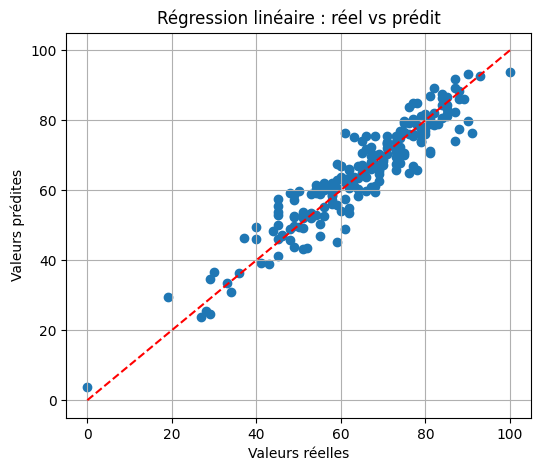

In [83]:
plt.figure(figsize=(6,5))
plt.scatter(Y_test, Y_pred, label="Predictions")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r--")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression linéaire : réel vs prédit")
plt.grid(True)

plt.savefig(f"{save_path}/regression_scatter.png", dpi=300)
plt.show()

## MSE Comparison

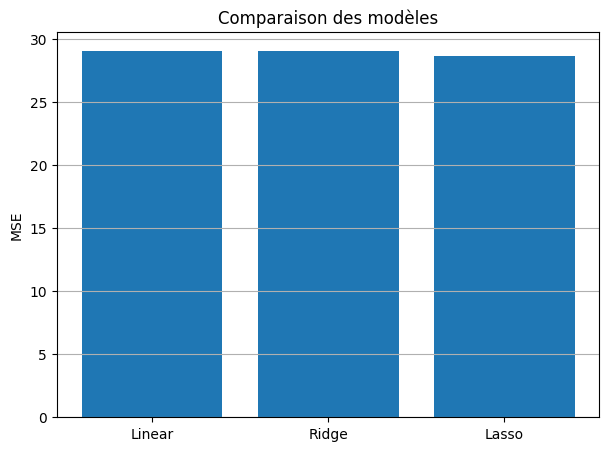

In [84]:
models = ["Linear", "Ridge", "Lasso"]
mse_values = [mse_linear, mse_ridge, mse_lasso]

plt.figure(figsize=(7,5))
plt.bar(models, mse_values)
plt.ylabel("MSE")
plt.title("Comparaison des modèles")
plt.grid(axis='y')

plt.savefig(f"{save_path}/regression_mse_comparison.png", dpi=300)
plt.show()

# 2. Classification Models — Breast Cancer Dataset

In [85]:
data_cancer = load_breast_cancer()
data = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
data["Outcome"] = data_cancer.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3.1 Cleaning & preprocessing

In [86]:
print(data.isnull().sum())

if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Outcome                    0
dtype: int64


## Preprocessing — Filling NaNs & removing duplicates

In [87]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        med = data[col].median()
        data[col] = data[col].fillna(med)

if data.duplicated().sum() > 0:
    data = data.drop_duplicates()

X = data.drop("Outcome", axis=1)
Y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

## 3.3 Logistic Regression (Base model)

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

acc_base = accuracy_score(Y_test, Y_pred)

print("=== Modèle de base ===")
print(f"Précision : {acc_base:.4f}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

=== Modèle de base ===
Précision : 0.9737
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 3.4 Regularized Logistic Regression (L2 & L1)

In [89]:
model_l2 = LogisticRegression(penalty="l2", C=10, solver="lbfgs", max_iter=1000)
model_l2.fit(X_train, Y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(Y_test, y_pred_l2)
print("Précision :", acc_l2)
print("\nRapport de classification :\n", classification_report(Y_test, y_pred_l2))

model_l1 = LogisticRegression(penalty="l1", C=10, solver="liblinear", max_iter=1000)
model_l1.fit(X_train, Y_train)
y_pred_l1 = model_l1.predict(X_test)
acc_l1 = accuracy_score(Y_test, y_pred_l1)
print("Précision :", acc_l1)
print("\nRapport de classification :\n", classification_report(Y_test, y_pred_l1))



Précision : 0.9736842105263158

Rapport de classification :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Précision : 0.956140350877193

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## 3.5 Confusion Matrices

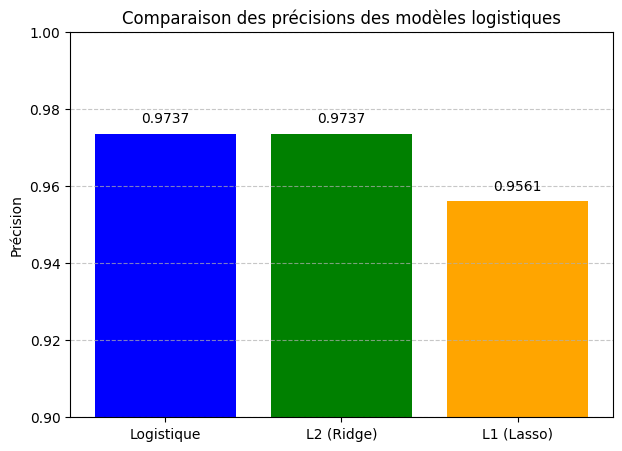

In [90]:
models = ['Logistique', 'L2 (Ridge)', 'L1 (Lasso)']
accuracies = [acc_base, acc_l2, acc_l1]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['blue','green','orange'])
plt.ylabel('Précision')
plt.ylim([0.9, 1.0])  
plt.title("Comparaison des précisions des modèles logistiques")
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.4f}", ha='center', va='bottom')

plt.savefig(f"{save_path}/logistic MSE", dpi=300)
plt.show()

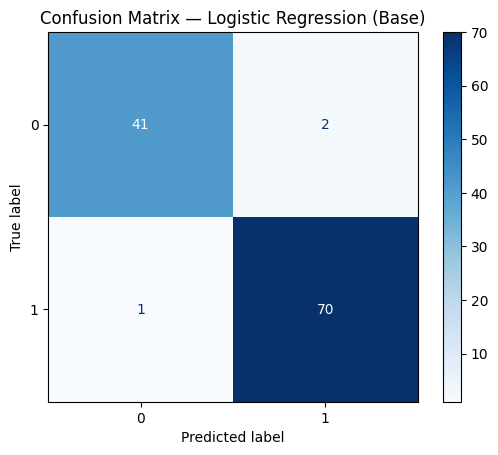

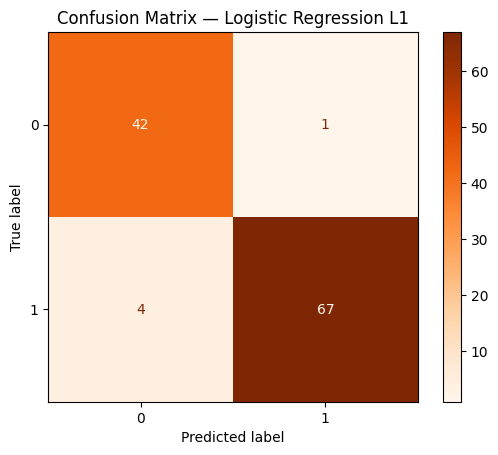

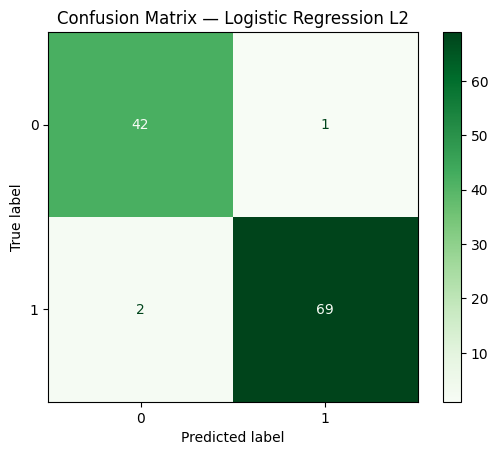

In [91]:
# Base model
disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression (Base)")
plt.savefig(f"{save_path}/conf_matrix_base.png", dpi=300)
plt.show()

# L1
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_l1, cmap='Oranges')
plt.title("Confusion Matrix — Logistic Regression L1")
plt.savefig(f"{save_path}/conf_matrix_L1.png", dpi=300)
plt.show()

# L2
disp = ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_l2, cmap='Greens')
plt.title("Confusion Matrix — Logistic Regression L2")
plt.savefig(f"{save_path}/conf_matrix_L2.png", dpi=300)
plt.show()

# 4. Conclusion

This notebook demonstrates:

- A complete ML workflow  
- Clean preprocessing  
- Model comparison  
- Saved visualizations  
- Professional structure  

This forms part of my Machine Learning Portfolio.